In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import statsmodels.formula.api as sm
from sklearn import linear_model
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load spreadsheet
xl = pd.ExcelFile('dataset_homemade.xlsx')

# Load a sheet into a DataFrame by name: df1
df = xl.parse('Sheet2')

In [3]:
df.tail()

,country,year,gdp_nominal - US$MM,gdp_per capita (usd),population,host_y,host_n,Index of Economic Freedom,no_of_internet_users,Gender gap index,number_sports_schools,Sports_budget- millions,Sports trainees,Rank,Olympics,GOLD,SILVER,BRONZE,total_No_of_medals
100,CRO,2000,21774.0,10582.668170,4505533,0,1,NaN,3063044,714.5,NaN,NaN,NaN,NaN,Summer,1,0,1,2
101,CUB,2000,NaN,6115.593942,11104313,0,1,NaN,4449238,716.9,NaN,NaN,NaN,NaN,Summer,11,11,7,29
102,NZL,2000,54138.0,21895.155980,3858032,0,1,NaN,4123439,751.0,NaN,NaN,NaN,NaN,Summer,1,0,3,4
103,CAN,2000,742319.0,32448.607640,30667365,0,1,NaN,32602776,716.5,NaN,NaN,NaN,NaN,Summer,3,3,8,14
104,IND,2000,476636.0,1648.208780,1053898107,0,1,NaN,500292635,601.1,NaN,NaN,NaN,NaN,Summer,0,0,1,1


In [65]:
df.columns

Index(['country', 'year', 'gdp_nominal - US$MM', 'gdp_per capita (usd)',
       'population', 'host_y', 'host_n', 'Index of Economic Freedom',
       'no_of_internet_users', 'Gender gap index', 'number_sports_schools',
       'Sports_budget- millions', 'Sports trainees', 'Rank', 'Olympics',
       'GOLD', 'SILVER', 'BRONZE', 'total_No_of_medals'],
      dtype='object')

In [66]:
df.shape

(105, 19)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 19 columns):
country                      105 non-null object
year                         105 non-null int64
gdp_nominal - US$MM          102 non-null float64
gdp_per capita (usd)         104 non-null float64
population                   105 non-null int64
host_y                       105 non-null int64
host_n                       105 non-null int64
Index of Economic Freedom    63 non-null float64
no_of_internet_users         105 non-null int64
Gender gap index             105 non-null float64
number_sports_schools        0 non-null float64
Sports_budget- millions      3 non-null float64
Sports trainees              0 non-null float64
Rank                         20 non-null float64
Olympics                     105 non-null object
GOLD                         105 non-null int64
SILVER                       105 non-null int64
BRONZE                       105 non-null int64
total_No_of_medals   

In [4]:
##columns dropped
df_new = df.iloc[:,np.r_[0:10,14:19]]

In [5]:
df_new.head()

,country,year,gdp_nominal - US$MM,gdp_per capita (usd),population,host_y,host_n,Index of Economic Freedom,no_of_internet_users,Gender gap index,Olympics,GOLD,SILVER,BRONZE,total_No_of_medals
0,USA,2016,18624475.0,59495.0,322179605,0,1,75.4,245436423,722.0,Summer,46,37,38,121
1,GBR,2016,2624529.0,43620.0,65788574,0,1,76.4,62354410,752.0,Summer,27,23,17,67
2,CHN,2016,11218281.0,16624.0,1403500365,0,1,52.0,746662194,676.0,Summer,26,18,26,70
3,RUS,2016,1527469.0,27890.0,146864513,0,1,50.6,110003284,691.0,Summer,19,17,19,55
4,GER,2016,3684816.0,50206.0,81914672,0,1,74.4,73436503,766.0,Summer,17,10,15,42


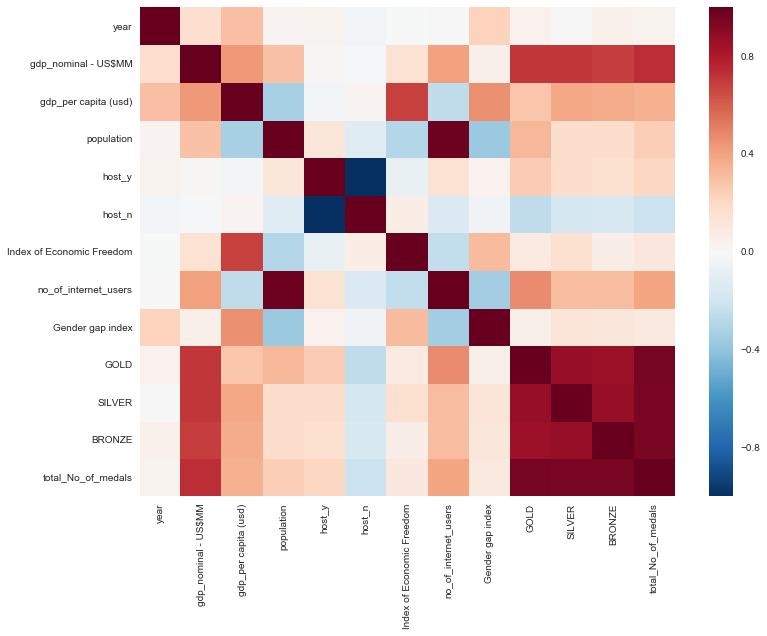

In [70]:
#correlation matrix
corrmat = df_new.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9);

In [71]:
corr=df_new.corr()["total_No_of_medals"]
corr

year                         0.032971
gdp_nominal - US$MM          0.740916
gdp_per capita (usd)         0.358122
population                   0.249202
host_y                       0.212756
host_n                      -0.212756
Index of Economic Freedom    0.108904
no_of_internet_users         0.392146
Gender gap index             0.100406
GOLD                         0.959320
SILVER                       0.952456
BRONZE                       0.947980
total_No_of_medals           1.000000
Name: total_No_of_medals, dtype: float64

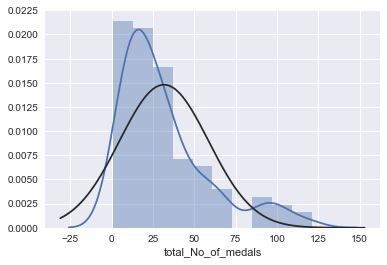

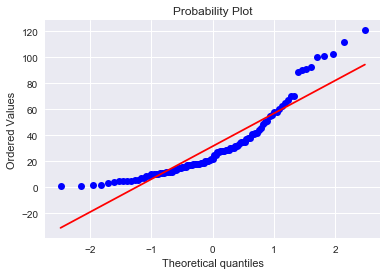

In [72]:
#Some data transformations
##Right Skewed
#histogram and normal probability plot
sns.distplot(df_new['total_No_of_medals'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_new['total_No_of_medals'], plot=plt)

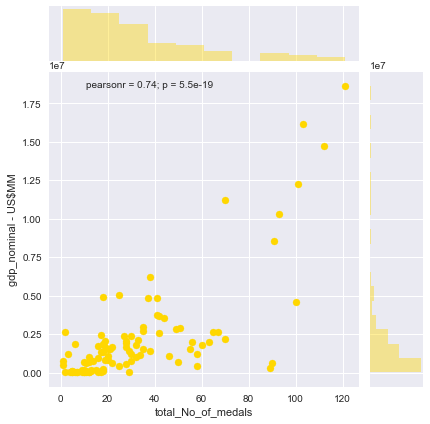

In [73]:
sns.jointplot(df_new['total_No_of_medals'],df_new['gdp_nominal - US$MM'],color='gold');

In [6]:
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import statsmodels.formula.api as sm

In [7]:
null_counts = df_new.isnull().sum()
null_counts[null_counts > 0].sort_values

<bound method Series.sort_values of gdp_nominal - US$MM           3
gdp_per capita (usd)          1
Index of Economic Freedom    42
dtype: int64>

In [8]:
#Treating Missing Values
df_new['gdp_nominal - US$MM'].fillna(df_new['gdp_nominal - US$MM'].median(), inplace=True)

In [9]:
#Treating Missing Values
df_new['gdp_per capita (usd)'].fillna(df_new['gdp_per capita (usd)'].median(), inplace=True)

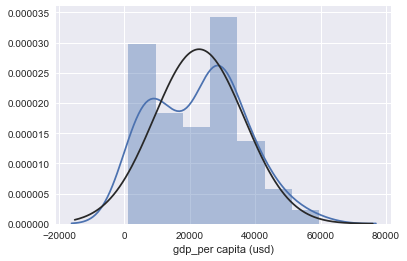

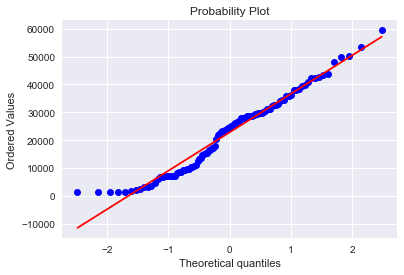

In [10]:
sns.distplot(df_new['gdp_per capita (usd)'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_new['gdp_per capita (usd)'], plot=plt)

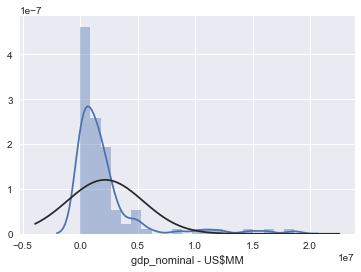

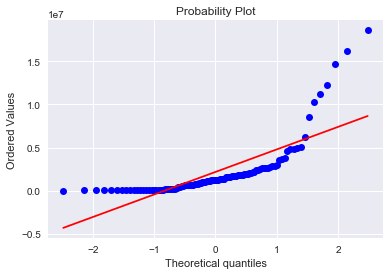

In [82]:
sns.distplot(df_new['gdp_nominal - US$MM'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_new['gdp_nominal - US$MM'], plot=plt)

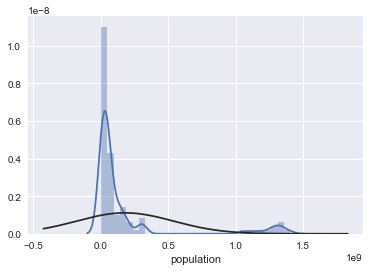

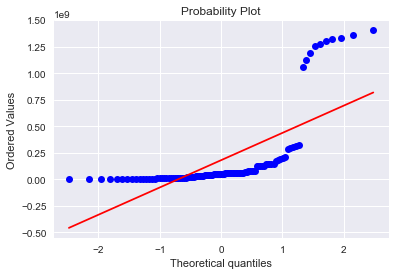

In [20]:
sns.distplot(df_new['population'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_new['population'], plot=plt)

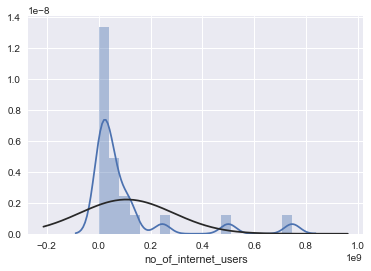

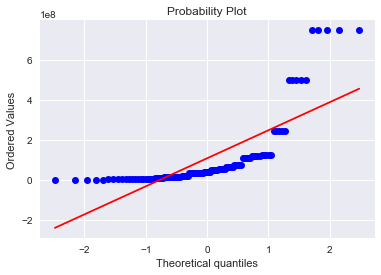

In [21]:
sns.distplot(df_new['no_of_internet_users'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_new['no_of_internet_users'], plot=plt)

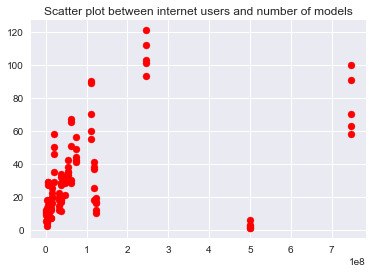

In [83]:
plt.scatter(df_new["no_of_internet_users"],df_new.total_No_of_medals, color='red')
plt.title("Scatter plot between internet users and number of models")

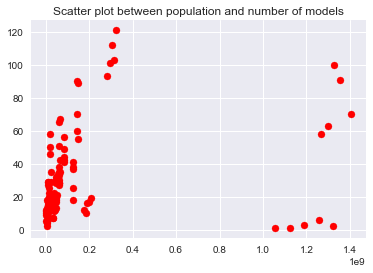

In [84]:
plt.scatter(df_new["population"],df_new.total_No_of_medals, color='red')
plt.title("Scatter plot between population and number of models")

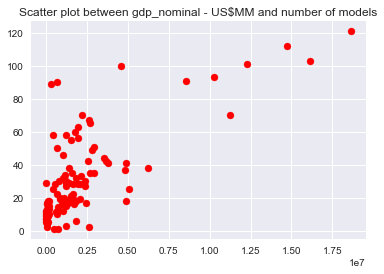

In [85]:
plt.scatter(df_new["gdp_nominal - US$MM"],df_new.total_No_of_medals, color='red')
plt.title("Scatter plot between gdp_nominal - US$MM and number of models")

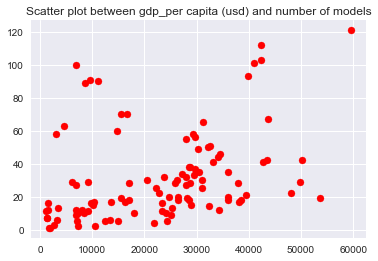

In [86]:
plt.scatter(df_new["gdp_per capita (usd)"],df_new.total_No_of_medals, color='red')
plt.title("Scatter plot between gdp_per capita (usd) and number of models")

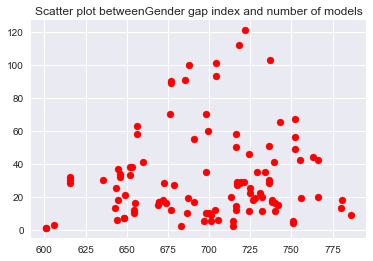

In [87]:
plt.scatter(df_new["Gender gap index"],df_new.total_No_of_medals, color='red')
plt.title("Scatter plot betweenGender gap index and number of models")

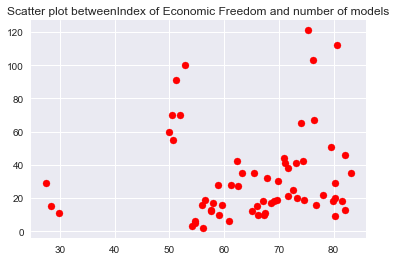

In [90]:
plt.scatter(df_new["Index of Economic Freedom"],df_new.total_No_of_medals, color='red')
plt.title("Scatter plot betweenIndex of Economic Freedom and number of models")

In [11]:
X = df_new[['no_of_internet_users','population','gdp_nominal - US$MM','gdp_per capita (usd)']] 
 

In [12]:
Y = df_new.iloc[:,-1]

In [13]:
###multiple regression

In [14]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import statsmodels.formula.api as sm

In [15]:
df_new.shape

(105, 15)

In [16]:
result = sm.OLS(Y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_No_of_medals   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     145.6
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           5.20e-41
Time:                        21:08:44   Log-Likelihood:                -440.06
No. Observations:                 105   AIC:                             888.1
Df Residuals:                     101   BIC:                             898.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
no_of_internet_users  3.412e-07   5.23e-08      6.523      0.000    2.37e-07    4.45e-07
population           -1.452e-07   2.55e-08     -5.705      0.000   -1.96e-07   -9.47e-08
gdp_nominal - US$MM   2.488e-06   6.84e-07      3.636      0.000    1.13e-06    3.85e-06
gdp_per capita (usd)     0.0006   8.09e-05      7.296      0.000       0.000       0.001
==============================================================================
Omnibus:                       35.763   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.405
Skew:                           1.284   Prob(JB):                     7.74e-19
Kurtosis:                       6.531   Cond. No.                     2.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
df_new.columns

Index(['country', 'year', 'gdp_nominal - US$MM', 'gdp_per capita (usd)',
       'population', 'host_y', 'host_n', 'Index of Economic Freedom',
       'no_of_internet_users', 'Gender gap index', 'Olympics', 'GOLD',
       'SILVER', 'BRONZE', 'total_No_of_medals'],
      dtype='object')

In [18]:
df_new.columns
df_1 = df_new.iloc[:,np.r_[2:7,8:10]].values


In [19]:
###Backward elimination approach to make optimal model
X1 = np.append(arr = np.ones((105,1)).astype(int), values = df_1, axis = 1)

In [20]:
x_1 = X1[:,[0,1,2,3,4,5,6,7]]

In [21]:
x = df_new[['no_of_internet_users','population','gdp_nominal - US$MM','host_n','Gender gap index']].values
y = df_new.iloc[:,-1].values

In [22]:
corr = np.corrcoef(x,rowvar=0)
corr

array([[ 1.        ,  0.97802742,  0.40880026, -0.14428339, -0.34515587],
       [ 0.97802742,  1.        ,  0.29737937, -0.12424288, -0.37060942],
       [ 0.40880026,  0.29737937,  1.        , -0.01578514,  0.05378809],
       [-0.14428339, -0.12424288, -0.01578514,  1.        , -0.04579491],
       [-0.34515587, -0.37060942,  0.05378809, -0.04579491,  1.        ]])

In [23]:
w,v = np.linalg.eig(corr)
w

array([2.35954303, 0.01443785, 0.56020941, 1.08221582, 0.98359388])

In [24]:
v[:,3]
v[:,4]

array([ 0.01360174, -0.03346345,  0.51814854,  0.83756998,  0.16939248])

In [25]:
reg_1 = sm.OLS(y,x_1).fit()
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     40.74
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           1.57e-24
Time:                        21:08:49   Log-Likelihood:                -429.22
No. Observations:                 105   AIC:                             872.4
Df Residuals:                      98   BIC:                             891.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8578     18.519     -0.262      0.794     -41.609      31.893
x1          3.492e-06   6.65e-07      5.248      0.000    2.17e-06    4.81e-06
x2          7.761e-05      0.000      0.524      0.601      -0.000       0.000
x3         -1.422e-07   2.35e-08     -6.047      0.000   -1.89e-07   -9.55e-08
x4             7.3376     10.885      0.674      0.502     -14.264      28.939
x5           -12.1954      9.139     -1.334      0.185     -30.331       5.940
x6          3.108e-07   4.87e-08      6.386      0.000    2.14e-07    4.07e-07
x7             0.0442      0.040      1.112      0.269      -0.035       0.123
==============================================================================
Omnibus:                       42.692   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.943
Skew:                           1.437   Prob(JB):                     7.40e-28
Kurtosis:                       7.506   Cond. No.                     2.92e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
#second model
x_2 = X1[:,[1,2,3,4,5,6,7]]
reg_2 = sm.OLS(y,x_2).fit()
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     40.74
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           1.57e-24
Time:                        21:08:50   Log-Likelihood:                -429.22
No. Observations:                 105   AIC:                             872.4
Df Residuals:                      98   BIC:                             891.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.492e-06   6.65e-07      5.248      0.000    2.17e-06    4.81e-06
x2          7.761e-05      0.000      0.524      0.601      -0.000       0.000
x3         -1.422e-07   2.35e-08     -6.047      0.000   -1.89e-07   -9.55e-08
x4             2.4798     28.972      0.086      0.932     -55.015      59.975
x5           -17.0532     27.101     -0.629      0.531     -70.835      36.728
x6          3.108e-07   4.87e-08      6.386      0.000    2.14e-07    4.07e-07
x7             0.0442      0.040      1.112      0.269      -0.035       0.123
==============================================================================
Omnibus:                       42.692   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.943
Skew:                           1.437   Prob(JB):                     7.40e-28
Kurtosis:                       7.506   Cond. No.                     1.22e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#third model
x_3 = X1[:,[1,2,3,5,6,7]]
reg_3 = sm.OLS(y,x_3).fit()
reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     120.7
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           2.93e-43
Time:                        21:08:51   Log-Likelihood:                -429.22
No. Observations:                 105   AIC:                             870.4
Df Residuals:                      99   BIC:                             886.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.489e-06   6.61e-07      5.277      0.000    2.18e-06     4.8e-06
x2          7.489e-05      0.000      0.521      0.604      -0.000       0.000
x3         -1.422e-07   2.34e-08     -6.083      0.000   -1.89e-07   -9.58e-08
x4           -19.2879      7.232     -2.667      0.009     -33.638      -4.938
x5          3.112e-07   4.82e-08      6.459      0.000    2.16e-07    4.07e-07
x6             0.0474      0.011      4.128      0.000       0.025       0.070
==============================================================================
Omnibus:                       42.752   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.691
Skew:                           1.441   Prob(JB):                     8.39e-28
Kurtosis:                       7.494   Cond. No.                     2.26e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#fourth model
x_4 = X1[:,[1,3,5,6,7]]
reg_4 = sm.OLS(y,x_4).fit()
reg_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     145.9
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           2.63e-44
Time:                        21:08:51   Log-Likelihood:                -429.37
No. Observations:                 105   AIC:                             868.7
Df Residuals:                     100   BIC:                             882.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.662e-06   5.69e-07      6.433      0.000    2.53e-06    4.79e-06
x2         -1.438e-07   2.31e-08     -6.223      0.000    -1.9e-07   -9.79e-08
x3           -19.5767      7.185     -2.725      0.008     -33.831      -5.323
x4          3.116e-07    4.8e-08      6.491      0.000    2.16e-07    4.07e-07
x5             0.0501      0.010      4.883      0.000       0.030       0.070
==============================================================================
Omnibus:                       40.730   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.745
Skew:                           1.389   Prob(JB):                     3.29e-25
Kurtosis:                       7.249   Cond. No.                     2.25e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#fourth model
x_5 = X1[:,[0,1,3,5,6,7]]
reg_5 = sm.OLS(y,x_5).fit()
reg_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     49.19
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           2.42e-25
Time:                        21:08:52   Log-Likelihood:                -429.36
No. Observations:                 105   AIC:                             870.7
Df Residuals:                      99   BIC:                             886.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7927     28.189     -0.028      0.978     -56.725      55.140
x1          3.659e-06   5.82e-07      6.287      0.000     2.5e-06    4.81e-06
x2         -1.438e-07   2.32e-08     -6.191      0.000    -1.9e-07   -9.77e-08
x3           -19.4950      7.784     -2.505      0.014     -34.939      -4.051
x4          3.117e-07   4.85e-08      6.433      0.000    2.16e-07    4.08e-07
x5             0.0511      0.037      1.369      0.174      -0.023       0.125
==============================================================================
Omnibus:                       40.772   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.798
Skew:                           1.391   Prob(JB):                     3.21e-25
Kurtosis:                       7.248   Cond. No.                     8.83e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.83e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
x1 = df_new[['gdp_nominal - US$MM','population','host_n','no_of_internet_users','Gender gap index']].values
y1 = df_new.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(x1,y1,test_size = 0.25, random_state = 0)
X_test = sm.add_constant(X_test) 
X_train = sm.add_constant(X_train) 

In [50]:
result_const = sm.OLS(y_train,X_train).fit()
result_const.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     54.24
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           4.65e-23
Time:                        21:10:57   Log-Likelihood:                -310.28
No. Observations:                  78   AIC:                             632.6
Df Residuals:                      72   BIC:                             646.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4611     27.870      0.052      0.958     -54.098      57.020
x1          4.085e-06   5.49e-07      7.447      0.000    2.99e-06    5.18e-06
x2         -1.301e-07   2.27e-08     -5.721      0.000   -1.75e-07   -8.48e-08
x3           -17.7918      8.188     -2.173      0.033     -34.115      -1.469
x4          2.854e-07   4.67e-08      6.112      0.000    1.92e-07    3.78e-07
x5             0.0438      0.037      1.183      0.241      -0.030       0.118
==============================================================================
Omnibus:                       36.707   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.839
Skew:                           1.360   Prob(JB):                     7.10e-31
Kurtosis:                       8.943   Cond. No.                     8.58e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.58e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
y_pred_const = result_const.predict(X_test)
y_pred_const 

array([54.70423253, 26.22290275, 89.57814271,  3.03950788, 32.75880007,
       35.55879045, 14.87948244, 15.3428213 , 11.08542232, 34.36031291,
       28.53409227, 23.58545376, 22.9815572 , 25.98829601, 25.21146098,
       25.08946282, 54.44232911, 35.93428501, 33.55573691, 25.74742028,
       37.59996345, 48.69003561, 32.46063478, 14.32226344, 24.38153615,
       26.50533086, 34.68780539])

In [52]:
y_test

array([38, 20, 70,  3, 28, 35, 10,  2, 16, 60, 90, 11, 46, 17, 21, 35, 65,
       70, 17, 28, 51, 37, 55, 17, 12, 10, 42], dtype=int64)

In [53]:
##mean  error
np.mean((result_const.predict(X_test) - y_test))

-2.5463674305619914

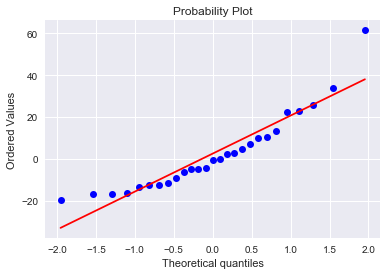

In [54]:
##QQ plot of errors
fig = plt.figure()
res = stats.probplot(y_test - y_pred_const, plot=plt)

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_ols_withconst= sqrt(mean_squared_error(y_test, y_pred_const))
rmse_ols_withconst

18.390982933772655

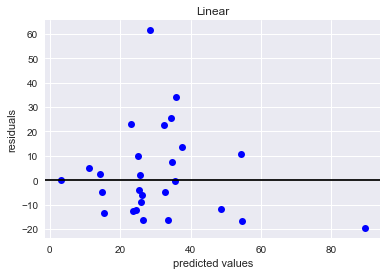

In [56]:
plt.plot(result_const.predict(X_test), y_test - result_const.predict(X_test), 'bo')
plt.axhline(y=0, color='black')
plt.title('Linear')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.show()

In [41]:
##without constant term

In [48]:
###splitting the data into trian and test set.
from sklearn.cross_validation import train_test_split
from sklearn import model_selection


In [43]:
x = df_new[['gdp_nominal - US$MM','population','host_n','no_of_internet_users','Gender gap index']].values
y = df_new.iloc[:,-1].values

In [44]:
x = df_new[['gdp_nominal - US$MM','population','host_n','no_of_internet_users','Gender gap index']].values

In [45]:
import statsmodels.api as sm

In [46]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [47]:
X_test.shape

(27, 5)

In [126]:
result = sm.OLS(y_train,X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     139.1
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           7.22e-36
Time:                        20:13:40   Log-Likelihood:                -310.28
No. Observations:                  78   AIC:                             630.6
Df Residuals:                      73   BIC:                             642.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           4.08e-06   5.35e-07      7.632      0.000    3.01e-06    5.15e-06
x2         -1.301e-07   2.26e-08     -5.762      0.000   -1.75e-07   -8.51e-08
x3           -17.6383      7.595     -2.322      0.023     -32.775      -2.501
x4          2.856e-07   4.61e-08      6.193      0.000    1.94e-07    3.78e-07
x5             0.0457      0.011      4.207      0.000       0.024       0.067
==============================================================================
Omnibus:                       36.793   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.622
Skew:                           1.366   Prob(JB):                     7.92e-31
Kurtosis:                       8.932   Cond. No.                     2.34e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
y_pred = result.predict(X_test)

In [128]:
y_pred  ##predicted values

array([54.60144307, 26.23817823, 89.63062736,  2.95816507, 32.82324095,
       35.60975127, 14.87075378, 15.36116791, 10.99466206, 34.3659528 ,
       28.50454365, 23.64124509, 23.01634266, 26.05114388, 25.11038312,
       25.13126065, 54.36025795, 35.93519398, 33.54452673, 25.77112731,
       37.65755588, 48.57955444, 32.45206203, 14.25833717, 24.4051325 ,
       26.43641562, 34.77945982])

In [129]:
y_test

array([38, 20, 70,  3, 28, 35, 10,  2, 16, 60, 90, 11, 46, 17, 21, 35, 65,
       70, 17, 28, 51, 37, 55, 17, 12, 10, 42], dtype=int64)

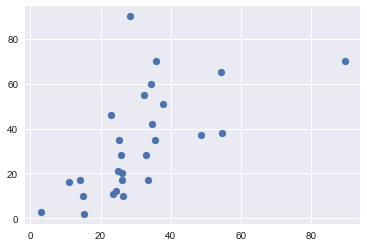

In [130]:
plt.scatter(result.predict(X_test),y_test)
plt.show()

In [132]:
##mean  error
np.mean((result.predict(X_test) - y_test))

-2.5522783344433786

In [133]:
##mean square error
np.mean((result.predict(X_test) - y_test)**2) 

338.16267765895765

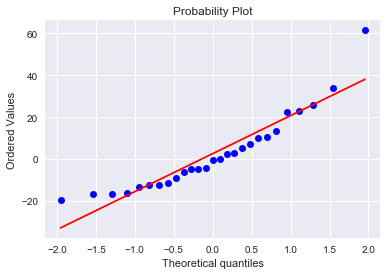

In [134]:
##QQ plot of errors
fig = plt.figure()
res = stats.probplot(y_test - y_pred, plot=plt)

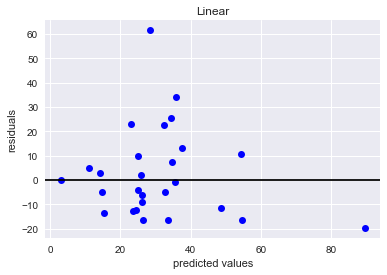

In [135]:
plt.plot(result.predict(X_test), y_test - result.predict(X_test), 'bo')
plt.axhline(y=0, color='black')
plt.title('Linear')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.show()

<Container object of 3 artists>

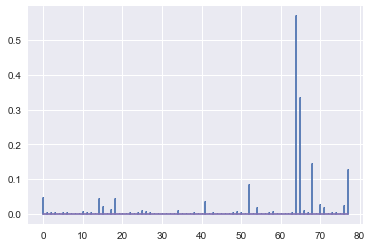

In [136]:
##cook's distance
influence = result.get_influence()

(cook, p) = influence.cooks_distance
plt.stem(np.arange(len(cook)), cook, markerfmt=",")

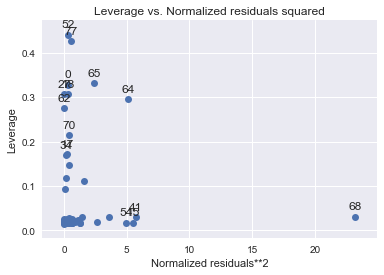

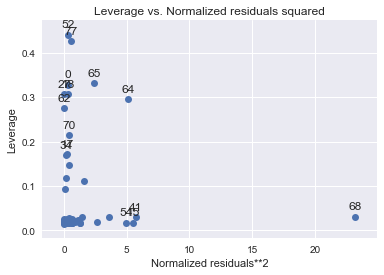

In [138]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(result)


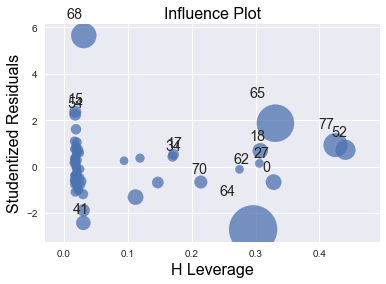

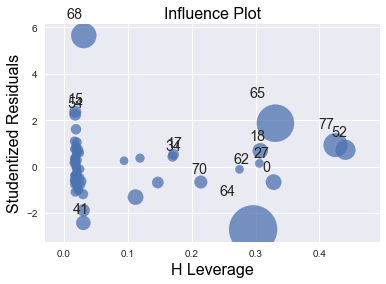

In [66]:
influence_plot(result)

In [139]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_ols_withoutscaling= sqrt(mean_squared_error(y_test, y_pred))
rmse_ols_withoutscaling

18.38920002770533

In [140]:
mean_squared_error(y_test, y_pred)

338.16267765895765

In [71]:
mean_absolute_error(y_test, y_pred)

13.58217196028744

In [72]:
#MAPE
y = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
y

67.33740754292982

In [75]:
# fit a model
lm = linear_model.LinearRegression()

model1 = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [76]:
model1.score(X_test, y_test)

0.3524513413500523

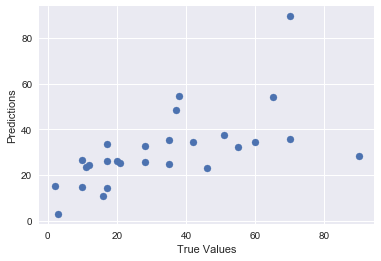

In [77]:

plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018E94AC8>,
      dtype=object)

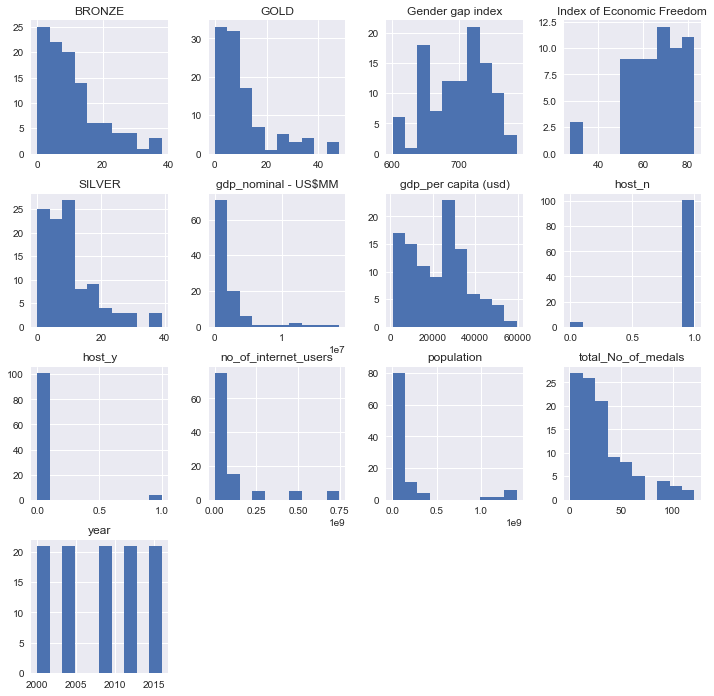

In [78]:

df_new[df_new.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")].index.values].hist(figsize=[12,12])

In [142]:

#Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
#Scaling down both train and test data set
X_trainminmax=minmax.fit_transform(X_train)
X_testminmax=minmax.fit_transform(X_test)

In [143]:
result1 = sm.OLS(y_train,X_trainminmax).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           5.12e-34
Time:                        20:14:55   Log-Likelihood:                -314.85
No. Observations:                  78   AIC:                             639.7
Df Residuals:                      73   BIC:                             651.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            71.7318     10.647      6.737      0.000      50.512      92.951
x2          -185.8023     32.167     -5.776      0.000    -249.910    -121.694
x3             4.0793      3.892      1.048      0.298      -3.678      11.837
x4           232.4739     35.989      6.460      0.000     160.748     304.200
x5            17.7102      6.369      2.781      0.007       5.016      30.404
==============================================================================
Omnibus:                       36.597   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.328
Skew:                           1.537   Prob(JB):                     4.45e-22
Kurtosis:                       7.561   Cond. No.                         34.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
y_pred1 = result1.predict(X_testminmax)

In [145]:
y_pred1

array([ 68.82467602,  32.02270817, 130.80288637,   9.66502042,
        41.22807628,  46.66458736,  15.46199248,  16.93689729,
         8.39308691,  41.45694414,  31.27807165,  28.66715309,
        28.15086501,  33.16804367,  26.48516022,  31.82245673,
        43.89956194,  43.8222004 ,  41.82390085,  32.89007597,
        48.99565913,  58.96728271,  38.32023855,  12.86361869,
        29.18196181,  27.89894803,  46.53416628])

In [146]:
y_test

array([38, 20, 70,  3, 28, 35, 10,  2, 16, 60, 90, 11, 46, 17, 21, 35, 65,
       70, 17, 28, 51, 37, 55, 17, 12, 10, 42], dtype=int64)

In [147]:
from math import sqrt
rmse_ols = sqrt(mean_squared_error(y_test, y_pred1))
rmse_ols

22.253664804011354

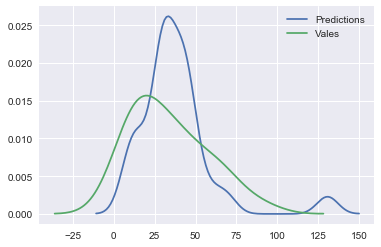

In [148]:
##line plot
sns.kdeplot(y_pred1, label = 'Predictions')
sns.kdeplot(y_test,label = 'Vales')

In [161]:
##gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

c = GradientBoostingRegressor()

c.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [162]:
pred = c.predict(X_test)
mae = np.mean(abs(pred - y_test))

In [163]:
mae

11.866478171644712

In [164]:
from math import sqrt
rmse_GB = sqrt(mean_squared_error(y_test, pred))
rmse_GB

16.36691220574231

In [165]:
pred

array([3.23584042e+01, 2.28115350e+01, 9.42551860e+01, 5.79116422e-02,
       2.81160773e+01, 3.72683197e+01, 6.98805526e+00, 1.22419607e+01,
       9.91260136e+00, 3.55379826e+01, 3.72074676e+01, 1.97705589e+01,
       3.90185891e+01, 1.97238119e+01, 3.14380902e+01, 2.34693525e+01,
       3.69978371e+01, 4.17160463e+01, 2.55739802e+01, 3.91590533e+01,
       3.72683197e+01, 2.61825257e+01, 3.55379826e+01, 1.53250779e+01,
       2.34159183e+01, 1.77283798e+01, 3.75298071e+01])

In [167]:
y_test

array([38, 20, 70,  3, 28, 35, 10,  2, 16, 60, 90, 11, 46, 17, 21, 35, 65,
       70, 17, 28, 51, 37, 55, 17, 12, 10, 42], dtype=int64)

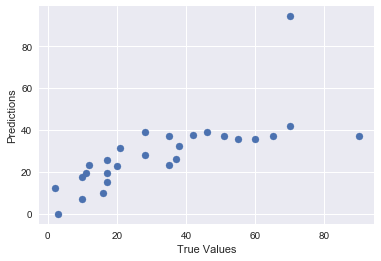

In [168]:
plt.scatter(y_test, pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [169]:
from sklearn.ensemble import RandomForestRegressor

In [170]:
c = RandomForestRegressor(random_state = 30)
c.fit(X_train,y_train)
pred = c.predict(X_test)
c

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=30,
           verbose=0, warm_start=False)

In [171]:
mean_squared_error(y_test, pred)

380.0618518518518

In [172]:
mae = np.mean(abs(pred - y_test))
mae

14.381481481481481

In [173]:
from math import sqrt
rmse_RF = sqrt(mean_squared_error(y_test, pred))
rmse_RF

19.495175091592582

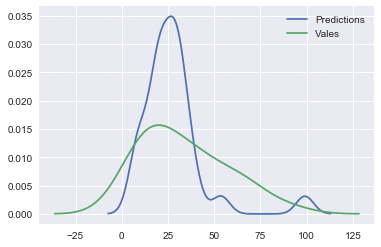

In [174]:
##line plot
sns.kdeplot(pred, label = 'Predictions')
sns.kdeplot(y_test,label = 'Vales')

In [175]:
from sklearn.neighbors import KNeighborsRegressor
c = KNeighborsRegressor(n_neighbors = 2)

In [176]:
c.fit(X_train,y_train)
c

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [177]:
pred = c.predict(X_test)
mae = np.mean(abs(pred - y_test))
mean_squared_error(y_test, pred)

100.38888888888889

In [178]:
mae = np.mean(abs(pred - y_test))
mae

7.444444444444445

In [179]:
from math import sqrt
rmse_KNN = sqrt(mean_squared_error(y_test, pred))
rmse_KNN

10.019425576792758

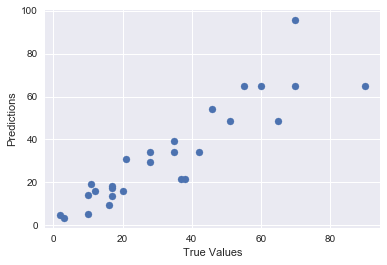

In [131]:
plt.scatter(y_test, pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

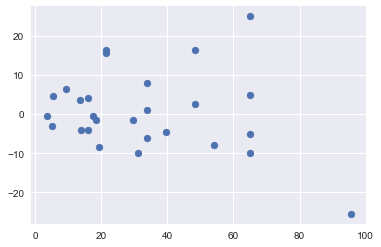

In [135]:
##residuals - fitted values
residual = y_test - pred
plt.scatter(pred,residual)

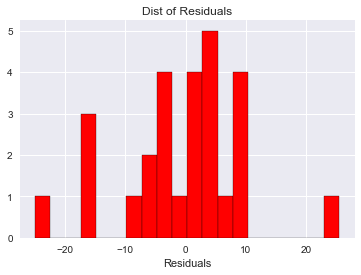

In [136]:
figsize = (8,8)

r = pred - y_test
plt.hist(r,color = 'red', bins = 20,edgecolor = 'black')
plt.xlabel('Residuals')
plt.title('Dist of Residuals')

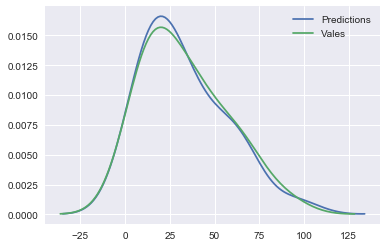

In [137]:
##line plot
sns.kdeplot(pred, label = 'Predictions')
sns.kdeplot(y_test,label = 'Vales')


In [182]:
###k-fold cross validation
from sklearn.model_selection import cross_val_score
efficiency = cross_val_score(estimator = c, X= X_train, y = y_train, cv = 10)
efficiency


array([ 0.90308735,  0.40965325,  0.9327203 ,  0.569522  ,  0.9600856 ,
       -0.12679426,  0.9458242 ,  0.91388119,  0.4723171 ,  0.71271263])

In [183]:
efficiency.mean()

0.6693009346625299

In [ ]:
##Applying Grid search method#Optimization techniques

In [195]:
from sklearn.model_selection import GridSearchCV
parameters = [{'algorithm': ['auto','ball_tree']# ‘kd_tree’, ‘brute’],
               ,'n_neighbors':[2,3,4,5],
               'leaf_size':[20,25,20,35],'p':[1,2],'n_jobs':[-1]}]
grid_s = GridSearchCV(estimator = c,param_grid = parameters,scoring = 'r2',cv = 10,n_jobs = -1)
grid_s = grid_s.fit(X_train,y_train)
best_param = grid_s.best_params_

In [196]:
best_param

{'algorithm': 'auto', 'leaf_size': 20, 'n_jobs': -1, 'n_neighbors': 2, 'p': 1}

In [197]:
best_accuracy = grid_s.best_score_
best_accuracy

0.6721860613751406

In [ ]:
##Applying XGBOOST method

In [184]:
from xgboost import XGBRegressor 
import xgboost as xgb

In [185]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [186]:
y_pred_xgb = model_xgb.predict(X_test)

In [187]:
y_pred_xgb

array([25.91366  , 22.357424 , 91.92497  ,  1.4327574, 35.94731  ,
       41.832443 ,  6.6670523, 13.504169 , 11.838178 , 43.31189  ,
       49.322346 , 22.17542  , 38.005123 , 19.268873 , 32.41469  ,
       22.55569  , 41.456036 , 39.523567 , 24.119549 , 36.21129  ,
       41.582233 , 32.110992 , 43.31189  , 15.800477 , 23.62751  ,
       11.471215 , 35.34391  ], dtype=float32)

In [188]:
y_test

array([38, 20, 70,  3, 28, 35, 10,  2, 16, 60, 90, 11, 46, 17, 21, 35, 65,
       70, 17, 28, 51, 37, 55, 17, 12, 10, 42], dtype=int64)

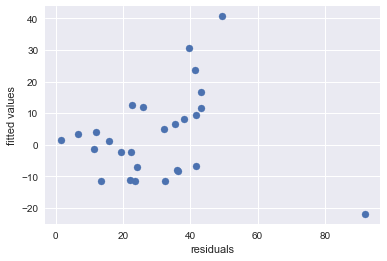

In [189]:
plt.scatter(y_pred_xgb,y_test-y_pred_xgb)

plt.xlabel("residuals")
plt.ylabel("fitted values")

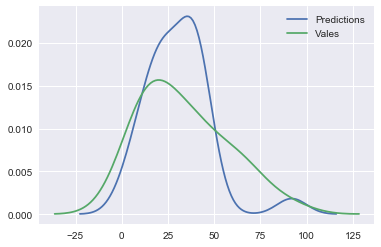

In [190]:
##line plot
sns.kdeplot(y_pred_xgb, label = 'Predictions')
sns.kdeplot(y_test,label = 'Vales')

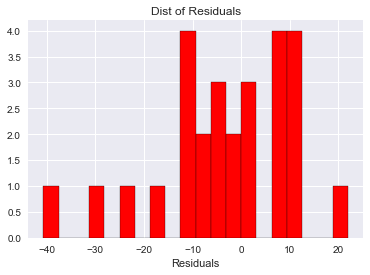

In [191]:
figsize = (8,8)
r = y_pred_xgb - y_test
plt.hist(r,color = 'red', bins = 20,edgecolor = 'black')
plt.xlabel('Residuals')
plt.title('Dist of Residuals')

In [192]:
mae = np.mean(abs(y_pred_xgb - y_test))
mae

10.76589121641936

In [193]:
from math import sqrt
rmse_xgb= sqrt(mean_squared_error(y_test, y_pred_xgb))
rmse_xgb

14.078155296805964

In [194]:
print(model_xgb.feature_importances_)


[0.3927959  0.24871355 0.0051458  0.11835334 0.23499142]


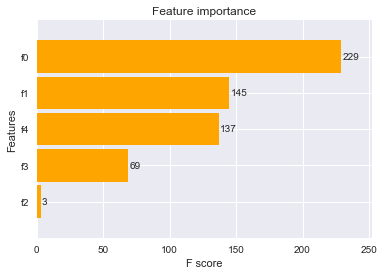

In [195]:
xgb.plot_importance(model_xgb,height=0.9,title='Feature importance',importance_type='weight', grid=True,color = 'orange')


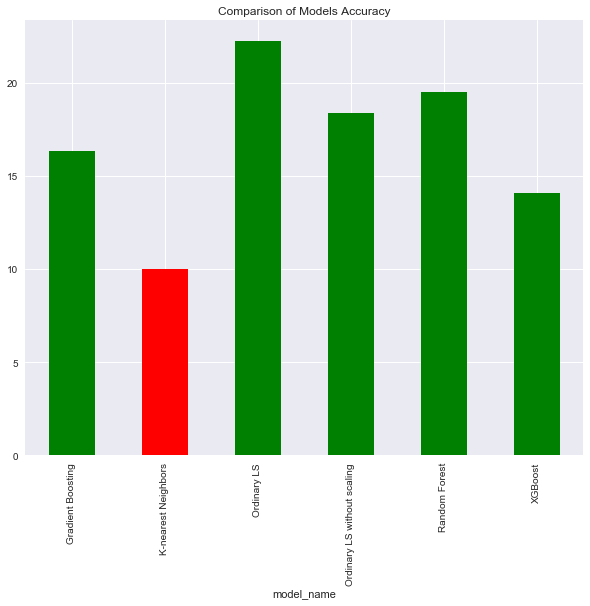

In [196]:
G = pd.DataFrame({'RMSE': [rmse_KNN,rmse_RF,rmse_GB,rmse_ols,rmse_ols_withoutscaling,rmse_xgb],'model_name':['K-nearest Neighbors','Random Forest','Gradient Boosting','Ordinary LS','Ordinary LS without scaling','XGBoost']})
ax = plt.subplot()
ax.set_title('Comparison of Models Accuracy')
G.groupby('model_name').mean()['RMSE'].plot(kind='bar',figsize=(10,8), ax = ax,color = ('green','red','green','green','green','green'))

In [230]:
df_pivot= df.pivot_table(index = "country",columns = "year",values = "total_No_of_medals",aggfunc = 'sum')

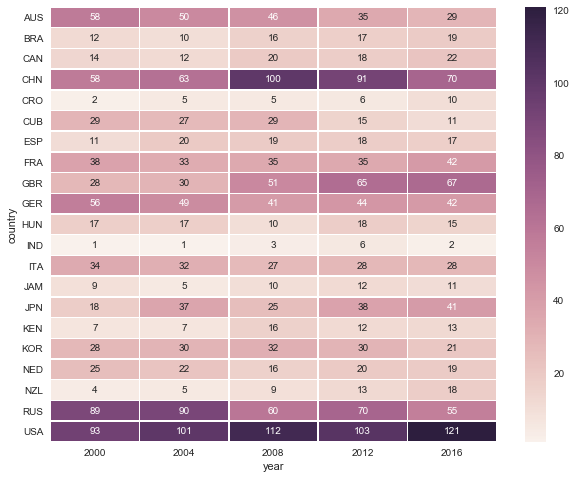

In [231]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_pivot, annot=True, fmt="d", linewidths=.5, ax=ax)

In [232]:
##Prediction on test dataset which contain values of parameters for 2020 year.

In [197]:
# Load spreadsheet
xl = pd.ExcelFile('test_data_2020_olympics.xlsx')

# Load a sheet into a DataFrame by name: df1
df_test = xl.parse('Sheet1')

In [198]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 14 columns):
country                      21 non-null object
year                         21 non-null int64
gdp_nominal - US$MM          20 non-null float64
gdp_per capita (usd)         0 non-null float64
population                   21 non-null int64
host_y                       21 non-null int64
host_n                       21 non-null int64
Index of Economic Freedom    0 non-null float64
no_of_internet_users         21 non-null int64
Gender gap index             21 non-null int64
GOLD                         0 non-null float64
SILVER                       0 non-null float64
BRONZE                       0 non-null float64
total_No_of_medals           0 non-null float64
dtypes: float64(7), int64(6), object(1)
memory usage: 2.4+ KB


In [199]:
##prediction of gold medals
o_2020 = df_test.iloc[:,np.r_[2:3,4:5,6:7,8:10]]
null_counts = o_2020.isnull().sum()
null_counts[null_counts > 0].sort_values

<bound method Series.sort_values of gdp_nominal - US$MM    1
dtype: int64>

In [200]:
#Treating Missing Values
df_test['gdp_nominal - US$MM'].fillna(df_test['gdp_nominal - US$MM'].median(), inplace=True)

In [201]:
##prediction of gold medals on validation sample
from sklearn.neighbors import KNeighborsRegressor
c = KNeighborsRegressor(n_neighbors = 2)

In [202]:
total_p =  df_test.iloc[:,np.r_[2:3,4:5,6:7,8:10]].values

In [203]:
total_p

array([[2.22357310e+07, 3.30846000e+08, 1.00000000e+00, 2.86942362e+08,
        7.18000000e+02],
       [3.12142100e+06, 6.61680000e+07, 1.00000000e+00, 6.30614190e+07,
        7.70000000e+02],
       [1.69520080e+07, 1.39047500e+09, 1.00000000e+00, 7.72000000e+08,
        6.74000000e+02],
       [1.78675500e+06, 1.41622000e+08, 1.00000000e+00, 1.09552842e+08,
        6.96000000e+02],
       [4.62862100e+06, 7.97860000e+07, 1.00000000e+00, 7.91275510e+07,
        7.78000000e+02],
       [5.49877700e+06, 1.24173000e+08, 0.00000000e+00, 1.18626672e+08,
        6.57000000e+02],
       [3.19615600e+06, 6.52340000e+07, 1.00000000e+00, 6.04216890e+07,
        7.78000000e+02],
       [1.86399700e+06, 5.08200000e+07, 1.00000000e+00, 4.73536490e+07,
        6.50000000e+02],
       [2.34024600e+06, 5.93280000e+07, 1.00000000e+00, 5.47982990e+07,
        6.92000000e+02],
       [1.66674300e+06, 2.53820000e+07, 1.00000000e+00, 2.17438030e+07,
        7.31000000e+02],
       [1.03915700e+06, 1.7059

In [204]:
c.fit(X_train,y_train)
pred_t = c.predict(total_p)


In [205]:
pred_t

array([112. ,  48.5,  95.5,  65. ,  43. ,  21.5,  51. ,  31. ,  35.5,
        39.5,  19.5,  16.5,  17.5,  29. ,  31. ,  11.5,   7. ,  21. ,
        15.5,  20. ,   4. ])

In [206]:
medals_table = pd.DataFrame(pred_t,columns=['Total Medals'])

In [207]:
medals_table

,Total Medals
0,112.0
1,48.5
2,95.5
3,65.0
4,43.0
5,21.5
6,51.0
7,31.0
8,35.5
9,39.5


In [208]:
##prediction of gold medals on validation sample
from sklearn.neighbors import KNeighborsRegressor
c = KNeighborsRegressor(n_neighbors = 2)

In [209]:
y = df_new.iloc[:,11].values

In [210]:
y

array([46, 27, 26, 19, 17, 12, 10,  9,  8,  8,  8,  8,  7,  7,  6,  6,  5,
        5,  4,  4,  0, 46, 29, 38, 20, 11,  7, 11, 13,  8,  8,  6,  8,  3,
        4,  2,  4,  3,  5,  6,  2,  0, 36, 19, 48, 24, 16,  9, 11, 13,  8,
       14,  7,  3,  3,  5,  6,  5,  0,  3,  3,  3,  1, 36,  9, 32, 28, 13,
       16, 11,  9, 10, 17,  4,  8,  5,  3,  1,  2,  1,  9,  3,  3,  0, 37,
       11, 28, 32, 13,  5, 13,  8, 13, 16, 12,  8,  0,  3,  2,  0,  1, 11,
        1,  3,  0], dtype=int64)

In [211]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [212]:
gold_model = c.fit(X_train,y_train)
pred_gold = c.predict(X_test)
mae = np.mean(abs(pred_gold - y_test))
mean_squared_error(y_test, pred_gold)

24.203703703703702

In [213]:
mae = np.mean(abs(pred_gold - y_test))
mae

3.185185185185185

In [214]:
from math import sqrt
rmse_KNN = sqrt(mean_squared_error(y_test, pred_gold))
rmse_KNN

4.919725978517879

In [215]:
pred_gold

array([ 7. ,  2.5, 43. ,  0. , 11. , 11. ,  1.5,  0.5,  1.5, 22. , 22. ,
        4. , 16.5,  4.5, 13. , 12.5, 18. , 22. ,  5. ,  9. , 18. ,  7. ,
       22. ,  5.5,  2.5,  1.5, 11. ])

In [216]:
y_test

array([ 7,  3, 26,  1, 11, 11,  5,  1,  6, 24, 28,  3, 14,  7,  9,  8, 29,
       20,  3,  8, 19, 16, 19,  8,  3,  5, 10], dtype=int64)

In [217]:
##prediction of gold medals for 2020 olypica using Test dataset
pred_gold = c.predict(total_p)

In [218]:
#prediction on 2020 data
pred_gold

array([46. , 18. , 43. , 22. , 14. ,  7. , 19. , 13. , 12. , 12.5,  7. ,
        8. ,  5. ,  8.5, 13. ,  5. ,  3. ,  7. ,  5. ,  3. ,  0. ])

In [219]:
##for silver medal
y = df_new.iloc[:,12].values

In [220]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [221]:
c.fit(X_train,y_train)
pred_silver = c.predict(X_test)
mae = np.mean(abs(pred_silver - y_test))
mean_squared_error(y_test, pred_silver)

19.5

In [222]:
mae = np.mean(abs(pred_silver - y_test))
mae

3.4444444444444446

In [223]:
from math import sqrt
rmse_KNN = sqrt(mean_squared_error(y_test, pred_silver))
rmse_KNN

4.415880433163924

In [224]:
pred_silver

array([ 7.5,  4. , 26.5,  1.5, 11.5, 10. ,  1.5,  2. ,  4. , 18. , 18. ,
       11. , 20.5, 10.5, 10. , 13.5, 16. , 18. ,  5. , 10. , 16. ,  7.5,
       18. ,  5.5,  4. ,  5. , 10. ])

In [225]:
y_test

array([14,  9, 18,  0, 10, 11,  3,  0,  4, 13, 26,  3, 15,  4,  3, 15, 17,
       20,  5, 12, 13,  9, 17,  6,  6,  2, 18], dtype=int64)

In [226]:
##prediction on 2020 data
pred_silver = c.predict(total_p)

In [227]:
pred_silver

array([32.5, 16. , 26.5, 18. , 15. ,  7.5, 17. , 10. , 11.5, 13.5,  6.5,
        3.5,  5. , 11. , 10. ,  4. ,  2. ,  5. ,  5.5,  4. ,  1.5])

In [228]:
###prediction for bronze medals

In [229]:
y = df_new.iloc[:,13].values

In [230]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [231]:
c.fit(X_train,y_train)
pred_bronze = c.predict(X_test)
mae = np.mean(abs(pred_bronze - y_test))
mean_squared_error(y_test, pred_bronze)

17.12962962962963

In [232]:
mae = np.mean(abs(pred_bronze - y_test))
mae

2.962962962962963

In [233]:
from math import sqrt
rmse_KNN = sqrt(mean_squared_error(y_test, pred_bronze))
rmse_KNN

4.138795673819817

In [234]:
pred_bronze

array([ 7. ,  9.5, 26. ,  2. , 11.5, 13. ,  2.5,  2.5,  4. , 25. , 25. ,
        4.5, 17. ,  3.5,  8. , 13.5, 14.5, 25. ,  7.5, 10.5, 14.5,  7. ,
       25. ,  2.5,  9.5,  7.5, 13. ])

In [235]:
y_test

array([17,  8, 26,  2,  7, 13,  2,  1,  6, 23, 36,  5, 17,  6,  9, 12, 19,
       30,  9,  8, 19, 12, 19,  3,  3,  3, 14], dtype=int64)

In [236]:
pred_bronze = c.predict(total_p)

In [237]:
pred_bronze

array([33.5, 14.5, 26. , 25. , 14. ,  7. , 15. ,  8. , 12. , 13.5,  6. ,
        5. ,  7.5,  9.5,  8. ,  2.5,  2. ,  9. ,  5. , 13. ,  2.5])

In [238]:
medals_table['gold medals'] =pred_gold


In [239]:
medals_table['silver medals'] =pred_silver
medals_table['bronze medals'] =pred_bronze

In [240]:
medals_table

,Total Medals,gold medals,silver medals,bronze medals
0,112.0,46.0,32.5,33.5
1,48.5,18.0,16.0,14.5
2,95.5,43.0,26.5,26.0
3,65.0,22.0,18.0,25.0
4,43.0,14.0,15.0,14.0
5,21.5,7.0,7.5,7.0
6,51.0,19.0,17.0,15.0
7,31.0,13.0,10.0,8.0
8,35.5,12.0,11.5,12.0
9,39.5,12.5,13.5,13.5


In [241]:
df_test['Total Medals'] = medals_table['Total Medals']
df_test['gold medals'] = medals_table['gold medals']
df_test['silver medals'] = medals_table['silver medals']
df_test['bronze medals'] = medals_table['bronze medals']

In [242]:
df_test

,country,year,gdp_nominal - US$MM,gdp_per capita (usd),population,host_y,host_n,Index of Economic Freedom,no_of_internet_users,Gender gap index,GOLD,SILVER,BRONZE,total_No_of_medals,Total Medals,gold medals,silver medals,bronze medals
0,USA,2020,22235731.0,NaN,330846000,0,1,NaN,286942362,718,NaN,NaN,NaN,NaN,112.0,46.0,32.5,33.5
1,GBR,2020,3121421.0,NaN,66168000,0,1,NaN,63061419,770,NaN,NaN,NaN,NaN,48.5,18.0,16.0,14.5
2,CHN,2020,16952008.0,NaN,1390475000,0,1,NaN,772000000,674,NaN,NaN,NaN,NaN,95.5,43.0,26.5,26.0
3,RUS,2020,1786755.0,NaN,141622000,0,1,NaN,109552842,696,NaN,NaN,NaN,NaN,65.0,22.0,18.0,25.0
4,GER,2020,4628621.0,NaN,79786000,0,1,NaN,79127551,778,NaN,NaN,NaN,NaN,43.0,14.0,15.0,14.0
5,JPN,2020,5498777.0,NaN,124173000,1,0,NaN,118626672,657,NaN,NaN,NaN,NaN,21.5,7.0,7.5,7.0
6,FRA,2020,3196156.0,NaN,65234000,0,1,NaN,60421689,778,NaN,NaN,NaN,NaN,51.0,19.0,17.0,15.0
7,KOR,2020,1863997.0,NaN,50820000,0,1,NaN,47353649,650,NaN,NaN,NaN,NaN,31.0,13.0,10.0,8.0
8,ITA,2020,2340246.0,NaN,59328000,0,1,NaN,54798299,692,NaN,NaN,NaN,NaN,35.5,12.0,11.5,12.0
9,AUS,2020,1666743.0,NaN,25382000,0,1,NaN,21743803,731,NaN,NaN,NaN,NaN,39.5,12.5,13.5,13.5


In [243]:
df_test.to_csv('out.csv')

In [283]:
##Applying log transformation method

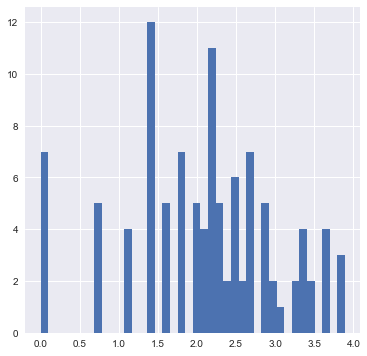

In [38]:
df_new['log_transformed_gold'] = (df['GOLD']+1).apply(np.log)  # Get the log of the data
df_new['log_transformed_gold'].hist(figsize = (6,6),bins=40)

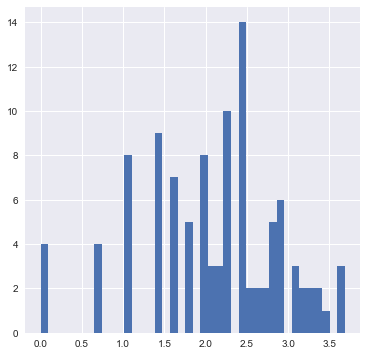

In [39]:
df_new['log_transformed_silver'] = (df['SILVER']+1).apply(np.log)  # Get the log of the data
df_new['log_transformed_silver'].hist(figsize = (6,6),bins=40)

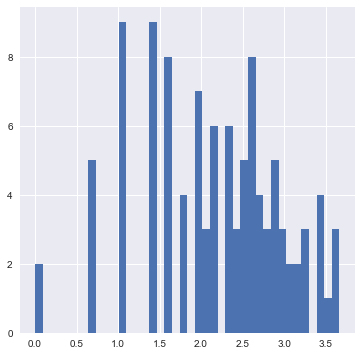

In [40]:
df_new['log_transformed_bronze'] = (df['BRONZE']+1).apply(np.log)  # Get the log of the data
df_new['log_transformed_bronze'].hist(figsize = (6,6),bins=40)

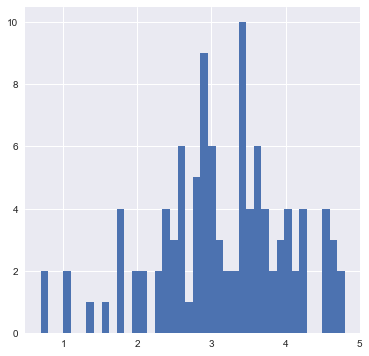

In [41]:
df_new['log_transformed_total'] = (df['total_No_of_medals']+1).apply(np.log)  # Get the log of the data
df_new['log_transformed_total'].hist(figsize = (6,6),bins=40)

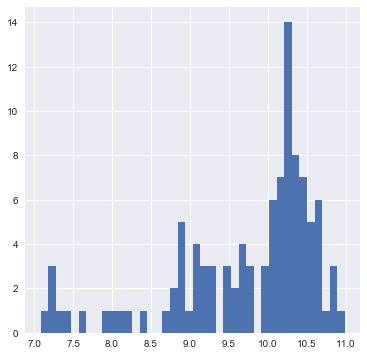

In [42]:
df_new['log_transformed_gdp_cap'] = (df['gdp_per capita (usd)']+1).apply(np.log)  # Get the log of the data
df_new['log_transformed_gdp_cap'].hist(figsize = (6,6),bins=40)

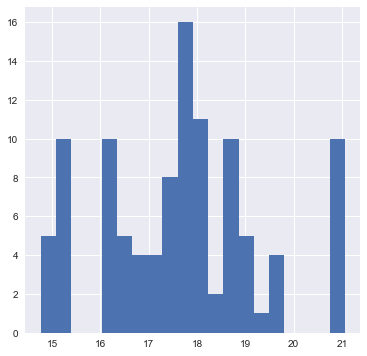

In [43]:
df_new['log_transformed_pop'] = (df['population']+1).apply(np.log)  # Get the log of the data
df_new['log_transformed_pop'].hist(figsize = (6,6),bins=20)

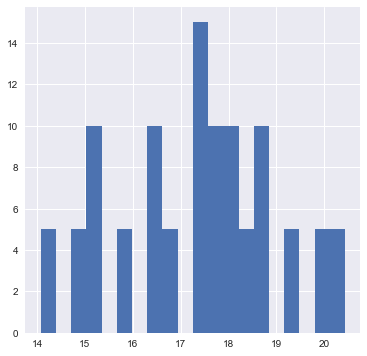

In [44]:
df_new['log_transformed_int'] = (df['no_of_internet_users']+1).apply(np.log)  # Get the log of the data
df_new['log_transformed_int'].hist(figsize = (6,6),bins=20)

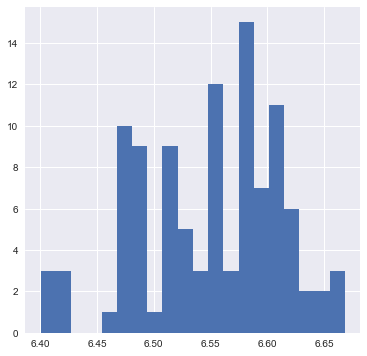

In [45]:
df_new['log_transformed_gg'] = (df['Gender gap index']+1).apply(np.log)  # Get the log of the data
df_new['log_transformed_gg'].hist(figsize = (6,6),bins=20)

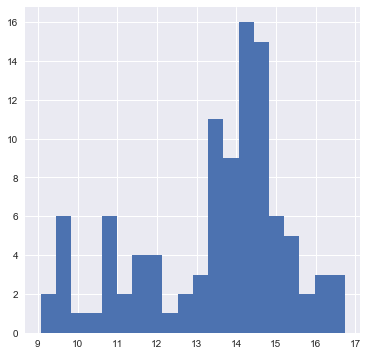

In [46]:
df_new['log_transformed_gdp_n'] = (df['gdp_nominal - US$MM']+1).apply(np.log)  # Get the log of the data
df_new['log_transformed_gdp_n'].hist(figsize = (6,6),bins=20)

In [49]:
import statsmodels.api as sm


In [50]:
null_counts = df_new.isnull().sum()
null_counts[null_counts > 0].sort_values

<bound method Series.sort_values of Index of Economic Freedom    42
log_transformed_gdp_cap       1
log_transformed_gdp_n         3
dtype: int64>

In [57]:
#Treating Missing Values
df_new['log_transformed_gdp_n'].fillna(df_new['log_transformed_gdp_n'].median(), inplace=True)
x = df_new[['log_transformed_int','log_transformed_pop','log_transformed_gdp_n','host_n','log_transformed_gg']].values
y = df_new.iloc[:,-1].values
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [58]:
result_log = sm.OLS(y_train_new,X_train_new).fit()
result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.967e+30
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        12:41:31   Log-Likelihood:                 2336.3
No. Observations:                  78   AIC:                            -4665.
Df Residuals:                      74   BIC:                            -4655.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2.442e-15   1.01e-14     -0.241      0.810   -2.27e-14    1.78e-14
x2           2.22e-16   8.93e-15      0.025      0.980   -1.76e-14     1.8e-14
x3             1.0000   2.61e-15   3.83e+14      0.000       1.000       1.000
x4          1.332e-15   4.15e-15      0.321      0.749   -6.93e-15    9.59e-15
==============================================================================
Omnibus:                        0.815   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.825
Skew:                           0.234   Prob(JB):                        0.662
Kurtosis:                       2.814   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""